In [7]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [8]:
crime=pd.read_csv(r"D:\DATA SCIENCE ASSIGNMENTS\7. CLUSTERING\crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [9]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [11]:
crime[crime.duplicated()].shape

(0, 5)

In [12]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

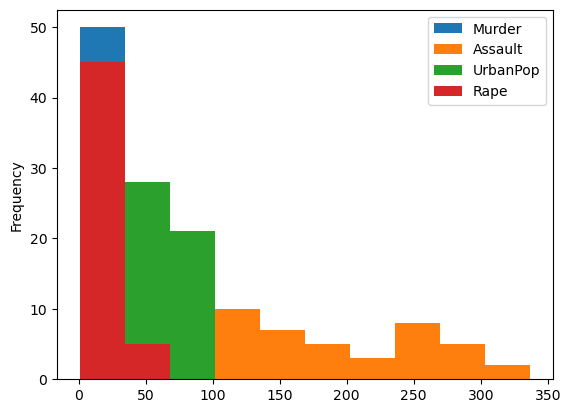

In [13]:
crime.plot.hist()

# HIERARCHICAL

In [14]:
# Normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [16]:
crime=(crime.iloc[:,1:])
crime.head()

,Assault,UrbanPop,Rape
0,236,58,21.2
1,263,48,44.5
2,294,80,31.0
3,190,50,19.5
4,276,91,40.6


In [17]:
# Normalized data frame 
crime_norm = norm_func(crime.iloc[:,1:])
crime_norm.head()

,UrbanPop,Rape
0,0.440678,0.359173
1,0.271186,0.961240
2,0.813559,0.612403
3,0.305085,0.315245
4,1.000000,0.860465


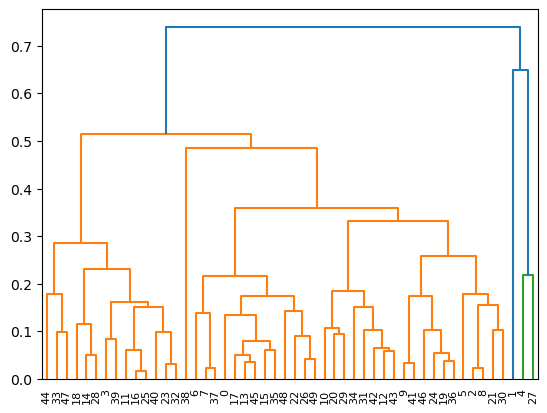

In [19]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='average'))

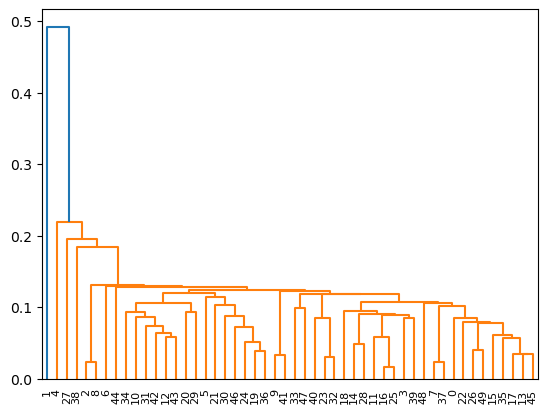

In [18]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='single'))

In [20]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [21]:
clusters=pd.DataFrame(hc.fit_predict(crime_norm),columns=['Clusters'])
clusters['Clusters'].value_counts()

0    48
1     1
2     1
Name: Clusters, dtype: int64

In [22]:
# save clusters for chart
y_hc = hc.fit_predict(crime_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [23]:
Clusters

,Clusters
0,0
1,1
2,0
3,0
4,2
5,0
6,0
7,0
8,0
9,0


In [25]:
crime['Clusters']=clusters
crime

,Assault,UrbanPop,Rape,Clusters
0,236,58,21.2,0
1,263,48,44.5,1
2,294,80,31.0,0
3,190,50,19.5,0
4,276,91,40.6,2
5,204,78,38.7,0
6,110,77,11.1,0
7,238,72,15.8,0
8,335,80,31.9,0
9,211,60,25.8,0


# K-MEANS CLUSTERING

In [26]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

<AxesSubplot:xlabel='X', ylabel='Y'>

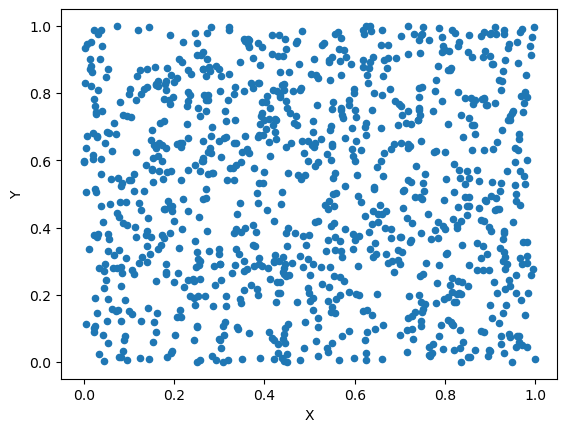

In [27]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.Y = Y
df_xy.X = X
df_xy.plot(x="X",y = "Y",kind="scatter")

In [28]:
X = np.random.uniform(0,1,1000)
X

array([8.97025071e-01, 3.63428511e-01, 5.92099129e-01, 5.42722974e-01,
       3.55602631e-01, 3.63846887e-01, 6.96385220e-01, 8.64634499e-01,
       5.62640992e-01, 4.83697563e-01, 4.18637354e-01, 7.65432041e-01,
       9.73240602e-01, 8.37340964e-01, 3.75768424e-01, 1.68001159e-01,
       5.27488427e-01, 7.96583777e-01, 8.70882568e-01, 9.83661998e-01,
       5.03192626e-01, 7.97351606e-01, 6.83460073e-02, 2.90348402e-01,
       1.52086350e-03, 2.45522002e-01, 4.03425537e-01, 2.68972964e-01,
       1.90777087e-01, 3.01597799e-01, 1.28730797e-01, 4.04134819e-01,
       9.18494753e-01, 2.34340044e-01, 9.24410155e-01, 8.13027388e-01,
       7.60271048e-01, 8.20248300e-01, 6.11435639e-01, 9.24811700e-02,
       1.80973671e-01, 6.58995452e-01, 3.78679794e-01, 1.23986556e-02,
       4.30651253e-01, 8.81978147e-02, 4.61379405e-01, 2.81253638e-01,
       1.99614910e-01, 3.24662281e-01, 7.16430253e-01, 3.57498358e-01,
       3.29630660e-01, 2.06375756e-01, 1.02126769e-03, 2.16836496e-01,
      

<AxesSubplot:xlabel='X', ylabel='Y'>

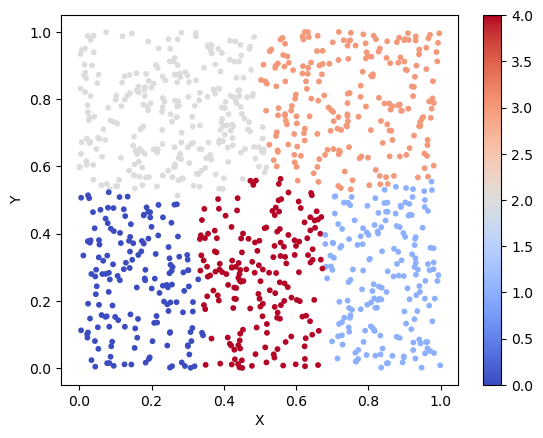

In [29]:
model1 = KMeans(n_clusters=5).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [32]:
crime=pd.read_csv(r"D:\DATA SCIENCE ASSIGNMENTS\7. CLUSTERING\crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [34]:
# Normalization  
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame 
df_norm = norm_func(crime.iloc[:,1:])


df_norm.head(10)  

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [35]:
# Selecting 5 clusters fromabove plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_ # getting cluster labels assigned to each row

array([0, 3, 3, 4, 3, 3, 2, 4, 3, 0, 2, 1, 3, 4, 1, 4, 4, 0, 1, 3, 2, 3,
       1, 0, 4, 4, 4, 3, 1, 2, 3, 3, 0, 1, 2, 4, 4, 2, 2, 0, 1, 0, 3, 2,
       1, 4, 2, 1, 1, 4])

In [36]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
crime['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [37]:
crime.iloc[:,1:7].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,14.671429,251.285714,54.285714,21.685714,0.0
1,2.680000,70.100000,51.000000,10.910000,1.0
2,4.955556,125.444444,80.111111,17.788889,2.0
3,10.966667,264.000000,76.500000,33.608333,3.0
4,6.975000,148.416667,62.333333,19.775000,4.0


In [38]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,3


In [39]:
Wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df_norm)
    Wcss.append(kmeans.inertia_)

C:\Users\vandi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


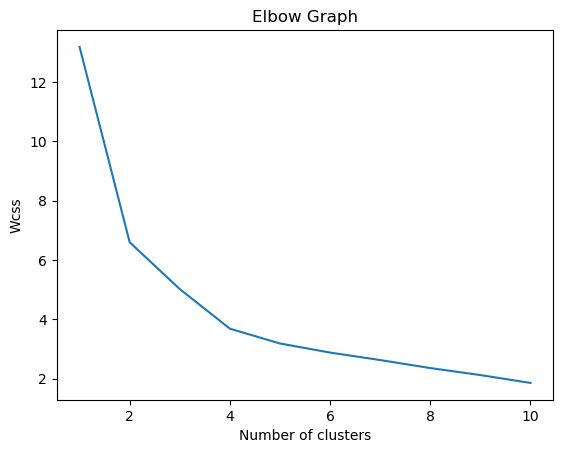

In [40]:
plt.plot(range(1,11),Wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

# DBSCAN CLUSTERING

In [41]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Import .csv file and convert it to a DataFrame object
crime=pd.read_csv(R"D:\DATA SCIENCE ASSIGNMENTS\7. CLUSTERING\crime_data.csv")

print(crime.head())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


In [43]:
print(crime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [44]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)

In [45]:
array=crime.values

In [46]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [47]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [48]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [49]:
dbscan = DBSCAN(eps=0.9, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.9)

In [50]:
#Noisy samples areassigned values  -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0],
      dtype=int64)

In [51]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [52]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [53]:
pd.concat([crime,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
